In [ ]:
# import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn import manifold


# fetching the data
data = datasets.fetch_openml(
    'mnist_784',
    version= 1,
    return_X_y= True )

# storing the data into variables
pixel_values, labels = data
pixel_values = pd.DataFrame(pixel_values)
labels = pd.DataFrame(labels.astype(int))   # this has the target variable

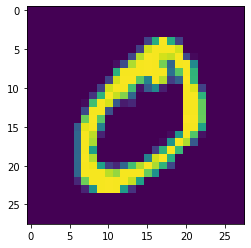

class    0
Name: 1, dtype: int32


In [13]:
# below code to see pixels into image
single_image = np.array(pixel_values.iloc[1]).reshape(28,28)
plt.imshow(single_image)
plt.show()
print(labels.iloc[1])

In [23]:
# below code is to change these many features into two using T-SNE
tsne = manifold.TSNE(n_components= 2, random_state= 123)
transformed_data = tsne.fit_transform(pixel_values[:3000])   # this means top 3000 rows and no slicing on columns

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [33]:

# lets again add two features from above and target variables in one dataframe
temp_data = np.column_stack((pd.DataFrame(transformed_data), labels[:3000]))
final_data = pd.DataFrame(temp_data , columns = ['X', 'y', 'labels'])
print(final_data.head(10))

           X          y  labels
0 -27.140987   7.077351     5.0
1 -60.939262  25.772728     0.0
2  31.201946  38.645882     4.0
3  29.415363 -44.875301     1.0
4  29.194738  14.064345     9.0
5  -0.835347 -32.451591     2.0
6   2.040474  -9.149618     1.0
7 -39.175606 -22.267740     3.0
8   7.871640 -12.278449     1.0
9  41.380039   5.300630     4.0


C:\Users\shiva\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


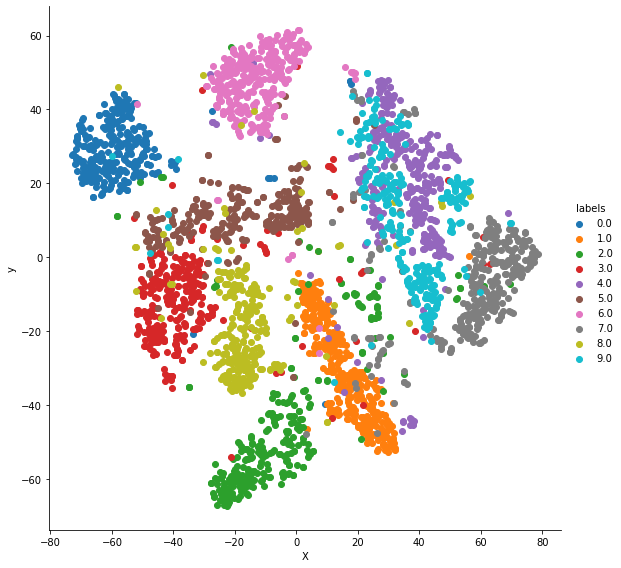

In [39]:
grid = sns.FacetGrid(final_data, hue = 'labels' , size = 8)
grid.map(plt.scatter, 'X' , 'y').add_legend()